### Set up your Mac environment by following the below instructions
#### Prerequisites
- Have [Homebrew](https://brew.sh/) installed.
- Have [pyenv](https://github.com/pyenv/pyenv) installed by running `brew install pyenv`, and configure properly.
- Install the python versions you wanted by using `pyenv`.

In [ ]:
# Install anaconda.
!brew cask install anaconda

In [ ]:
# Check what necessary ops you need to do after the installation.
!brew cask info anaconda

In [ ]:
# Install jupyter.
!conda install jupyter

In [ ]:
# Create our first conda environment.
!conda create --no-default-packages -n day00_jupyter_practice python=3.5.4

In [ ]:
# Check what conda environments you have.
!conda info --envs

In [ ]:
# List linked packages in a conda environment.
!conda list

In [ ]:
# To see which magic commands you have available in your interpreter.
%lsmagic

In [ ]:
%pwd

In [ ]:
%%timeit
square_evens = [n * n for n in range(100)]

In [5]:
# Show some data frames.

import pandas as pd
import numpy as np

df = pd.DataFrame(np.random.randn(10, 7))
df

,0,1,2,3,4,5,6
0,0.271766,-0.037467,-0.889367,-0.284045,-1.232180,0.231930,-1.243991
1,-0.501164,0.746145,0.215721,0.593978,-0.528266,-2.125961,0.628896
2,-2.328197,-0.512504,0.495394,0.004569,0.077279,-0.483586,-0.478227
3,0.757728,2.308366,-1.974855,0.933532,0.524761,1.251927,0.466587
4,0.899994,-0.897160,-0.107529,-0.050574,0.580098,0.986586,1.832367
5,0.030985,-0.316532,0.614447,1.077202,1.052287,-1.350174,1.510086
6,0.690747,-0.058552,1.098091,-0.652835,-0.719366,-0.686164,-0.113717
7,-0.542850,-2.154154,-0.812521,-0.817369,-0.982787,1.209457,0.419427
8,-0.496061,-0.997271,-0.263044,-0.916578,1.041765,0.492012,-2.628045
9,-1.486843,0.116292,-1.634187,-0.397939,-0.845161,0.733410,0.989960


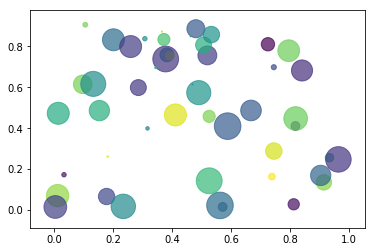

In [7]:
# Simple demo of a scatter plot.

import numpy as np
import matplotlib.pyplot as plt

N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (17 * np.random.rand(N)) ** 2

plt.scatter(x, y, s=area, c=colors, alpha=0.7)
plt.show()

In [ ]:
# Load a YouTube video.
from IPython.display import YouTubeVideo
YouTubeVideo('Lykgg5phVJE')

In [ ]:
# Export conda 'environment.yml'.
#
# So in future you can create the exactly same environment with `conda env create -f environment.yml`.
#
# Or if you want to specify a different install path than the default one
# of your system(not related to 'prefix' in the environment.yml), just use the '-p' flag followed by the required
# path: `onda env create -f environment.yml -p /home/user/anaconda3/envs/env_name`.
!conda env export | grep -v "^prefix: " > environment.yml

# Cat to see what is in the 'environment.yml'.
%cat environment.yml

In [ ]:
# List jupyter kernels.
!jupyter kernelspec list

In [ ]:
# Install jupyter Golang kernel, more details refer here: https://github.com/gopherdata/gophernotes#mac
!brew install zmq
!go get -u github.com/gopherdata/gophernotes
!mkdir -p ~/Library/Jupyter/kernels/gophernotes
!cp $GOPATH/src/github.com/gopherdata/gophernotes/kernel/* ~/Library/Jupyter/kernels/gophernotes
!jupyter kernelspec list

### Epilogue
- Although we have both 'Python 3' and `Go` kernels, but jupyter hasn't support to have multiple languages in one notebook yet, more details can follow this github issue: [Allowing multiple languages in one notebook #2815](https://github.com/jupyterlab/jupyterlab/issues/2815).

#### FYI: my `.bash_profile`

```bash
export PS1="[\u@\H \w]\$ "

alias ll='ls -alF'
alias subl='/Applications/Sublime\ Text.app/Contents/SharedSupport/bin/subl'

#
## Prefix 'PATH' in idempotent manner.
#
function prefix_path() {
  for var in "$@"
  do
    if [[ ":$PATH:" != *":$var:"* ]]; then
      export PATH=$var:$PATH
    fi
  done
}

#
## Setting GOROOT should NOT be necessary for newer version Go,
## and you can always get $GOROOT by `go env GOROOT`.
#
export GOPATH="$HOME/go_projects"
prefix_path "$GOPATH/bin"

#
## For function `nvm`.
#
export NVM_DIR="$HOME/.nvm"
. "$(brew --prefix nvm)/nvm.sh"

#
## For command `envsubst`.
#
prefix_path "$(brew --prefix gettext)/bin"

#
## For anaconda.
#
prefix_path '/usr/local/anaconda3/bin'

#
## For 'pyenv'.
#
if which pyenv > /dev/null && [[ ":$PATH:" != *'/.pyenv/'* ]]; then
 eval "$(pyenv init -)"
fi

#
## For 'jenv'.
#
if which jenv > /dev/null && [[ ":$PATH:" != *'/.jenv/'* ]]; then
 eval "$(jenv init -)"
fi

if [ -f /usr/local/etc/bash_completion.d ]; then
  . /usr/local/etc/bash_completion.d
fi
```